In [73]:
import pandas as pd

sensor_name = 'nyc-micronet-bknyrd'
sensor_name = sensor_name.split('-')[-1]

start_time_utc = pd.to_datetime( '2021-09-02 01:27:30+00:00' )
end_time_utc = pd.to_datetime( '2021-09-02 03:11:30+00:00' )

padding = '30min'

start_time_utc = start_time_utc - pd.Timedelta(padding)
start_time_utc =  start_time_utc.isoformat().replace( "+00:00" , "Z")

end_time_utc = end_time_utc + pd.Timedelta(padding)
end_time_utc =  end_time_utc.isoformat().replace( "+00:00" , "Z")

print( sensor_name , start_time_utc , end_time_utc )

bknyrd 2021-09-02T00:57:30Z 2021-09-02T03:41:30Z


In [80]:
import io
import requests

timerange = f"{start_time_utc}/{end_time_utc}"
payload = "variables[]=precip:incremental@mm&variables[]=precip@mm&variables[]=precip_max_intensity@mm/min"
url = f'https://api.nysmesonet.org/data/dynserv/coned/5min/nyc/{timerange}?{payload}'

print( url )

data = requests.get( url )

df = pd.read_csv( io.StringIO( data.content.decode('utf-8') ) , sep="," , parse_dates=['datetime'])
df.head()

https://api.nysmesonet.org/data/dynserv/coned/5min/nyc/2021-09-02T00:57:30Z/2021-09-02T03:41:30Z?variables[]=precip:incremental@mm&variables[]=precip@mm&variables[]=precip_max_intensity@mm/min


,station,datetime,precip_incremental [mm],precip_utc [mm],precip_max_intensity [mm/min]
0,BKBROW,2021-09-02 01:00:00+00:00,0.13,8.12,0.00
1,BKMAPL,2021-09-02 01:00:00+00:00,0.27,3.68,0.11
2,BKNYRD,2021-09-02 01:00:00+00:00,1.57,10.46,0.76
3,BXVNST,2021-09-02 01:00:00+00:00,1.07,30.82,0.25
4,MHALPH,2021-09-02 01:00:00+00:00,0.69,11.03,0.40


In [82]:
df = df[ df['station'] == sensor_name.upper() ].copy()
df['time_ny'] = df['datetime'].dt.tz_convert('America/New_York').dt.tz_localize(None)
df = df[ ['time_ny']  + list(df.columns[ df.columns.str.contains('precip') ].values) ]

df['precip_max_intensity [in/min]'] = 0.03937008 * df['precip_max_intensity [mm/min]']

df.head()

,time_ny,precip_incremental [mm],precip_utc [mm],precip_max_intensity [mm/min]
2,2021-09-01 21:00:00,1.57,10.46,0.76
19,2021-09-01 21:05:00,0.90,11.36,0.38
36,2021-09-01 21:10:00,1.32,12.68,0.35
53,2021-09-01 21:15:00,2.55,15.23,0.57
70,2021-09-01 21:20:00,3.57,18.80,0.89


<Axes: xlabel='time_ny', ylabel='precip_max_intensity [in/min]'>

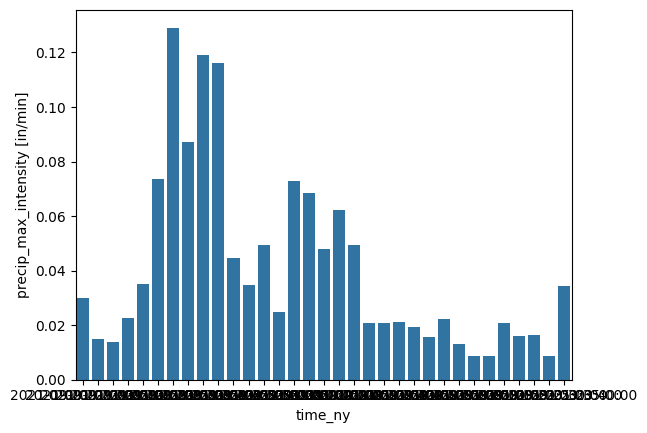

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data = df,
    x = 'time_ny' , y = 'precip_max_intensity [in/min]'
)